In [11]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [19]:
# Novec 7000 properties
M = 200 # g/mol
boiling_point = 273+34 # K at 1 atm 
T = np.linspace(-120,30,1000)+273
Vapor_pressure = np.exp(-3548.6/T+22.978) # pa 
rho = 1400 # kg/m3
latent_heat = 142 # kJ/kg (heat to convert liquid to gas at boiling point)

c = 1300 # specific heat [j/(kg K)]
k = 0.075 # Thermal conductivity [w/(m*K)]



Text(0.5, 0, 'Temperature [$^\\circ C$]')

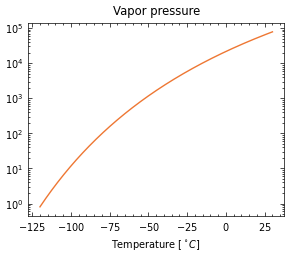

In [26]:
plt.title('Vapor pressure')
plt.semilogy(T-273,Vapor_pressure)
plt.xlabel('Vapor pressure [$pa$]')

plt.xlabel('Temperature [$^\circ C$]')

In [3]:

V = 1.5e-3
P = np.linspace(0.1,1,100)*1e5
P_amb = 1e5
T = 303 # K
R = 8.314

n = (P+P_amb)*V/(R*T)
m = n*M
V_liquid = m*rho/1000
#print('Mass needed to reach', P/1000, '[kPa] is', m, '[g]')

In [4]:
V

0.0015

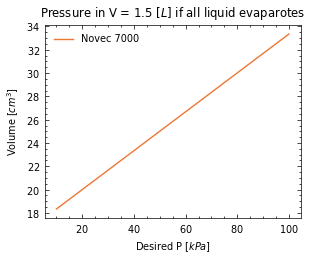

In [5]:
plt.plot(P/1000,V_liquid,label='Novec 7000')
plt.title(f"Pressure in V = {V*1000} [$L$] if all liquid evaparotes")
plt.xlabel('Desired P [$kPa$]')
plt.ylabel('Volume [$cm^3$]')
plt.legend()